In [1]:
# http://gihyo.jp/dev/serial/01/machine-learning/0017

import numpy as np
import matplotlib.pyplot as plt
import random

# データ点を特徴ベクトルに変換
def phi(x, y):
    return np.array([x, y, 1])

# 末尾に定数項にあたる 1 を付け加えるバージョン
# (今回はこちらは使いません)
#def phi(x):
#  return np.concatenate((x, [1]))

In [2]:
N = 100 # データ点の個数
np.random.seed(0)  # データ点のために乱数列を固定

# ランダムなN×2行列を生成 = ２次元空間上のランダムな点N個
X = np.random.randn(N, 2)

def h(x, y):
    return 5 * x + 3 * y -1  # 適当に決めた真の分離平面 5x+3y = 1

T = np.array([1 if h(x, y) > 0 else -1 for x, y in X])

In [3]:
#list(range(5))
#_list = list(range(N))
#_list

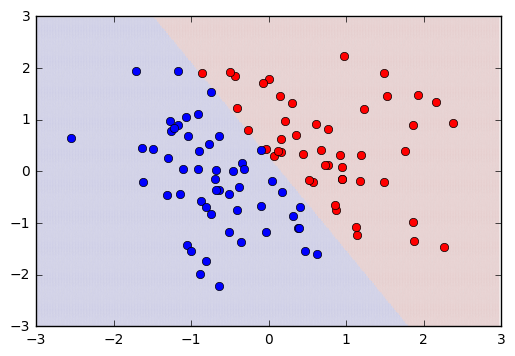

In [12]:
w = np.zeros(3) # 3次の0ベクトル

np.random.seed()
while True:
#for i in range(1000):  # 1000 回までデータを回して学習
    _list = list(range(N))
    random.shuffle(_list)

    misses = 0 # 予測を外した回数
    for n in _list:
        x_n, y_n = X[n, :]
        t_n = T[n]
    
        # 予測
        predict = np.sign( (w * phi(x_n, y_n)).sum() )
        # 予測が正解なら、パラメータを更新する
        if predict != t_n:
            w += t_n * phi(x_n, y_n)
            misses += 1
    
    # 予測が外れる点がなくなったら学習終了
    if misses == 0:
        break;
        
# 図
seq = np.arange(-3, 3, 0.02)
xlist, ylist = np.meshgrid(seq, seq)
zlist = [np.sign((w * phi(x, y)).sum()) for x, y in zip(xlist, ylist)]

plt.pcolor(xlist, ylist, zlist, alpha=0.2, edgecolors='white')
plt.plot(X[T==1,0], X[T==1,1], 'o', color='red')
plt.plot(X[T==-1,0], X[T==-1,1], 'o', color='blue')
plt.show()